In [3]:
tasmia = "In the name of Allah, the most Benoficient, the most Merciful"
print(tasmia)

In the name of Allah, the most Benoficient, the most Merciful


### Import Libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [32]:
df = pd.read_csv("Superstore.csv", index_col = "Order Date", parse_dates = ["Order Date"])
df.sample(2)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2013-05-23,8456,CA-2013-154081,5/30/2013,Standard Class,JE-15610,Jim Epp,Corporate,United States,Los Angeles,California,90049,West,TEC-PH-10001918,Technology,Phones,Nortel Business Series Terminal T7208 Digital ...,222.384,2,0.2,22.2384
2011-03-11,7018,CA-2011-114790,3/13/2011,Second Class,FM-14215,Filia McAdams,Corporate,United States,Richmond,Kentucky,40475,South,OFF-PA-10000213,Office Supplies,Paper,Xerox 198,14.940,3,0.0,7.0218


**Unique Dates**

In [44]:
len(df.index.unique())

1238

**Select Relevant Columns**

In [36]:
ocs = df.groupby([df.index, "Category"])["Sales"].agg(["sum"]).reset_index()
ocs = ocs.rename(columns = {"sum": "Sales"})
ocs = ocs.set_index("Order Date")
ocs.head()

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.448
2011-01-05,Office Supplies,288.060
2011-01-06,Office Supplies,19.536
2011-01-07,Furniture,2573.820
2011-01-07,Office Supplies,685.340


**Select values in specific range**

In [38]:
ocs[ocs["Category"] == "Technology"]['2011-03':'2011-09']

,Category,Sales
Order Date,,
2011-03-01,Technology,5.940
2011-03-02,Technology,151.200
2011-03-03,Technology,9.990
2011-03-05,Technology,479.970
2011-03-11,Technology,620.930
...,...,...
2011-09-20,Technology,2050.960
2011-09-21,Technology,2286.338
2011-09-23,Technology,83.984


**Pivot Table**

In [67]:
p_ocs = pd.pivot_table(ocs, index = ocs.index, columns = "Category", values = "Sales").fillna(0)
p_ocs.columns.name = None
p_ocs.head()

,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,0.000,16.448,0.00
2011-01-05,0.000,288.060,0.00
2011-01-06,0.000,19.536,0.00
2011-01-07,2573.820,685.340,1147.94
2011-01-08,76.728,10.430,0.00


**Resamplng**

In [86]:
business_sales = p_ocs.resample("B").sum()
print("Business Sales")
print(business_sales.head(), "\n")

holiday_sales = p_ocs.resample("h").sum()
print("Hourly Sales")
print(holiday_sales.head(), "\n")

sales_weekly = p_ocs.resample("W").sum()
print("Weekly Sales")
print(sales_weekly.head(), "\n")

monthly_sales = p_ocs.resample("M").sum()
print("Monthly Sales")
print(monthly_sales.head(), "\n")

quarterly_sales = p_ocs.resample("Q").sum()
print("Quarterly Sales")
print(quarterly_sales.head(), "\n")

yearly_sales = p_ocs.resample("Y").sum()
print("Yearly Sales")
print(yearly_sales.head(), "\n")



Business Sales
            Furniture  Office Supplies  Technology
Order Date                                        
2011-01-04      0.000           16.448        0.00
2011-01-05      0.000          288.060        0.00
2011-01-06      0.000           19.536        0.00
2011-01-07   2650.548          695.770     1147.94
2011-01-10      0.000            9.344       31.20 

Hourly Sales
                     Furniture  Office Supplies  Technology
Order Date                                                 
2011-01-04 00:00:00        0.0           16.448         0.0
2011-01-04 01:00:00        0.0            0.000         0.0
2011-01-04 02:00:00        0.0            0.000         0.0
2011-01-04 03:00:00        0.0            0.000         0.0
2011-01-04 04:00:00        0.0            0.000         0.0 

Weekly Sales
            Furniture  Office Supplies  Technology
Order Date                                        
2011-01-09   2650.548         1019.814     1147.94
2011-01-16   1003.779    

**Downsampling**

In [87]:
sm_sa = yearly_sales.resample("M").interpolate(method = "spline", order = 3).round(2)
sm_sa.head()

,Furniture,Office Supplies,Technology
Order Date,,,
2011-12-31,157192.85,151776.41,175278.23
2012-01-31,157062.62,147084.68,168957.77
2012-02-29,157200.89,143355.49,164096.18
2012-03-31,157611.09,140049.01,159969.03
2012-04-30,158251.03,137493.33,156975.06


**Stationarity Transformations**

In [91]:
print("Yearly Sales Difference")
print(yearly_sales.diff(), "\n")

print("Yearly Sales % Change")
print(yearly_sales.pct_change() * 100, "\n")

Yearly Sales Difference
             Furniture  Office Supplies  Technology
Order Date                                         
2011-12-31         NaN              NaN         NaN
2012-12-31  13325.3839       -14542.949  -12497.424
2013-12-31  28383.1990        46277.127   63280.995
2014-12-31  16485.8332        63015.977   45971.383 

Yearly Sales % Change
            Furniture  Office Supplies  Technology
Order Date                                        
2011-12-31        NaN              NaN         NaN
2012-12-31   8.477093        -9.581824   -7.130049
2013-12-31  16.645257        33.721460   38.874973
2014-12-31   8.288444        34.339150   20.335759 



**Rolling Mean**

In [105]:
window_size = 7
rolling_window = p_ocs.rolling(window_size)
print('Rolling Mean')
rolling_window.mean().dropna().head()

Rolling Mean


,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-11,386.069714,147.435429,168.448571
2011-01-12,387.489714,145.085714,168.448571
2011-01-14,513.195286,393.522286,260.840000
2011-01-15,522.046714,390.731429,260.840000
2011-01-16,154.358143,292.825714,118.270000


### Visualizations

**Monthly Sales by Category**

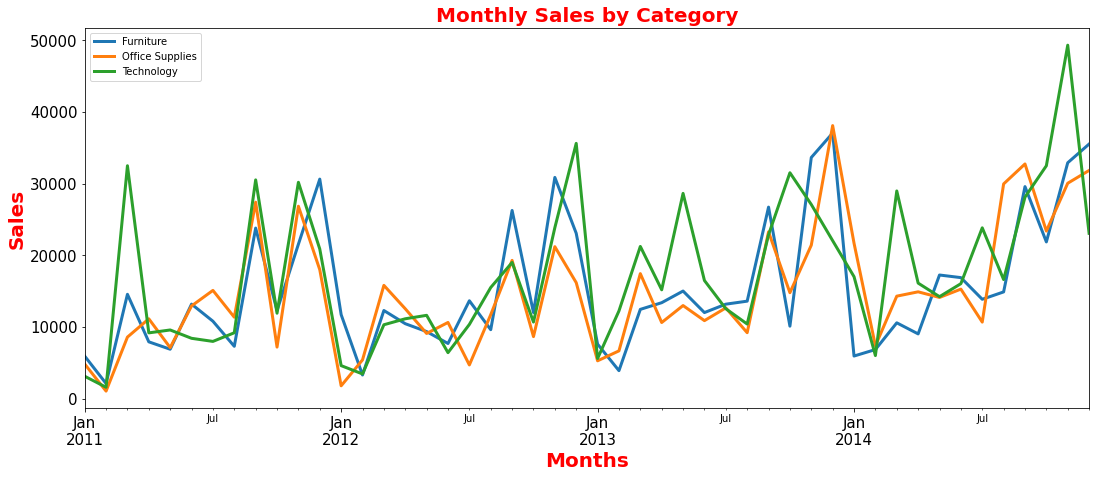

In [112]:
monthly_sales.plot(figsize = (18, 7), linewidth = 3)
plt.title("Monthly Sales by Category", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Months", size = 20, color = "red", weight = "bold")
plt.ylabel("Sales", size = 20, color = "red", weight = "bold")
plt.show()

**Quarterly Sales by Category**

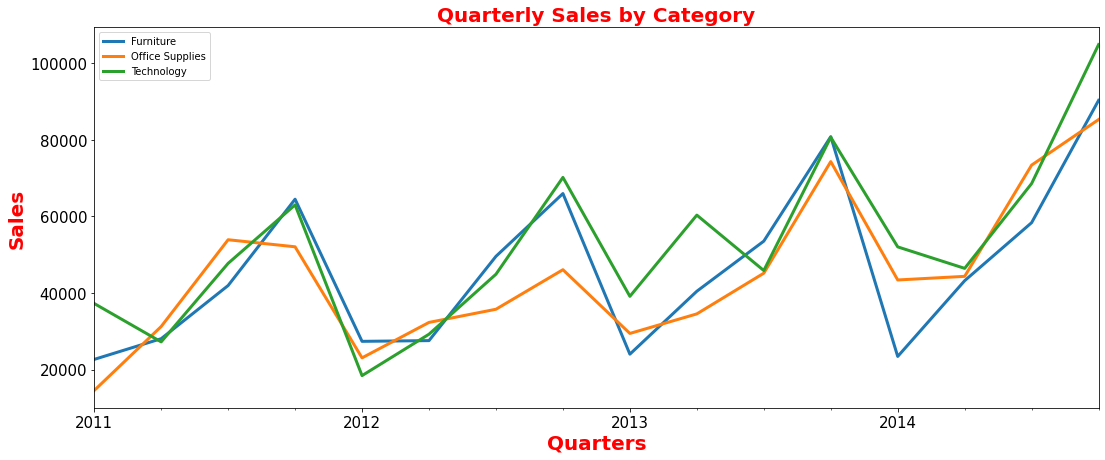

In [114]:
quarterly_sales.plot(figsize = (18, 7), linewidth = 3)
plt.title("Quarterly Sales by Category", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Quarters", size = 20, color = "red", weight = "bold")
plt.ylabel("Sales", size = 20, color = "red", weight = "bold")
plt.show()

**Yearly Sales  by Category**

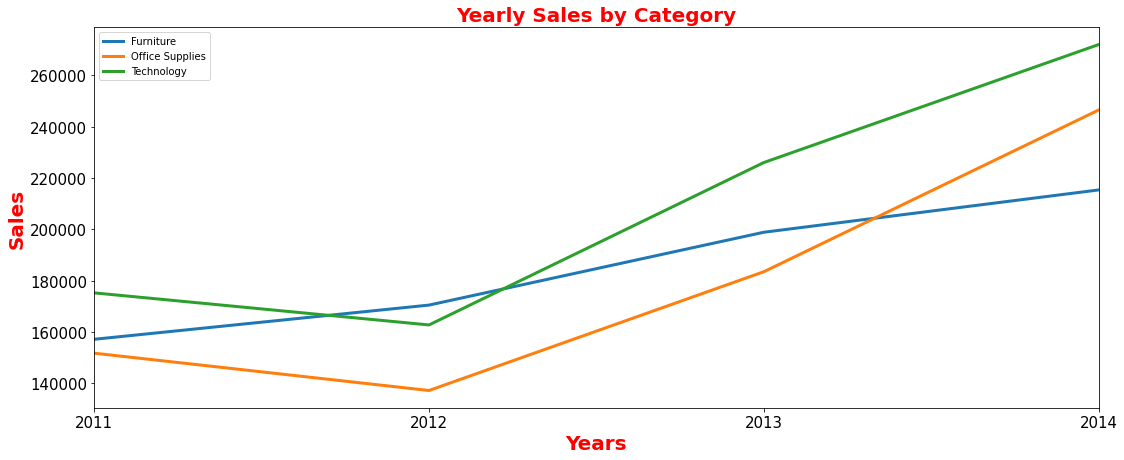

In [116]:
yearly_sales.plot(figsize = (18, 7), linewidth = 3)
plt.title("Yearly Sales by Category", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Years", size = 20, color = "red", weight = "bold")
plt.ylabel("Sales", size = 20, color = "red", weight = "bold")
plt.show()

**Sales and Profit by Segment by Resampling  Year**

In [127]:
one = df[["Category", "Sales", "Profit"]]
one[:5]

,Category,Sales,Profit
Order Date,,,
2013-11-09,Furniture,261.9600,41.9136
2013-11-09,Furniture,731.9400,219.5820
2013-06-13,Office Supplies,14.6200,6.8714
2012-10-11,Furniture,957.5775,-383.0310
2012-10-11,Office Supplies,22.3680,2.5164


In [130]:
one_pivot = one.pivot_table(index = one.index, columns = "Category")
month_resample = one_pivot.resample("Y").sum()
month_resample

Profit                                       Sales  \
Category      Furniture Office Supplies    Technology     Furniture   
Order Date                                                            
2011-12-31  2219.020167     4621.906670  11364.677083  69538.821326   
2012-12-31  -367.691360     5736.210224  15513.249298  75666.751801   
2013-12-31  3396.413526     6602.517716  25948.833861  83485.736931   
2014-12-31  1805.038088     6530.216474  25475.554338  79021.003215   

                                           
Category   Office Supplies     Technology  
Order Date                                 
2011-12-31    30105.173291   76929.672714  
2012-12-31    27875.637319   72300.945100  
2013-12-31    33054.929374  114288.700790  
2014-12-31    38916.248002  117558.944595